In [2]:
# Cell 1: Import libraries and load the processed dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define paths (use current notebook's directory to calculate the path)
notebook_dir = os.getcwd()  # Gets the current working directory (python/)
project_dir = os.path.dirname(notebook_dir)  # Goes up one level to project root
data_path = os.path.join(project_dir, 'data', 'processed', 'processed_data.csv')

# Load the processed dataset
df = pd.read_csv(data_path)

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46946 entries, 0 to 46945
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order_Id               46946 non-null  int64  
 1   Origin_City            46946 non-null  object 
 2   Origin_Country         46946 non-null  object 
 3   Origin_Latitude        46946 non-null  float64
 4   Origin_Longitude       46946 non-null  float64
 5   Destination_City       46946 non-null  object 
 6   Destination_Country    46946 non-null  object 
 7   Shipping_Mode          46946 non-null  object 
 8   Shipping_Days          46946 non-null  int64  
 9   Cost                   46946 non-null  float64
 10  Quantity               46946 non-null  int64  
 11  Product_Name           46946 non-null  object 
 12  order_date             46946 non-null  object 
 13  Shipping_date          46946 non-null  object 
 14  Destination_Latitude   46946 non-null  f

In [3]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
           Order_Id  Origin_Latitude  Origin_Longitude  Shipping_Days  \
count  46946.000000     46946.000000      46946.000000   46946.000000   
mean   34231.611383        29.740479        -84.811178       3.501278   
std    21448.157841         9.801007         21.249896       1.621143   
min       12.000000       -33.937553       -158.025986       0.000000   
25%    21593.000000        18.265772        -97.991127       2.000000   
50%    28242.500000        33.128519        -76.980972       3.000000   
75%    52911.250000        39.270561        -66.370583       5.000000   
max    77204.000000        48.770958        115.049789       6.000000   

               Cost      Quantity  Destination_Latitude  \
count  46946.000000  46946.000000          46946.000000   
mean     179.953454      2.096749              5.319476   
std      114.125908      1.448374             23.625936   
min        7.490000      1.000000            -53.166700   
25%      100.000000      1.

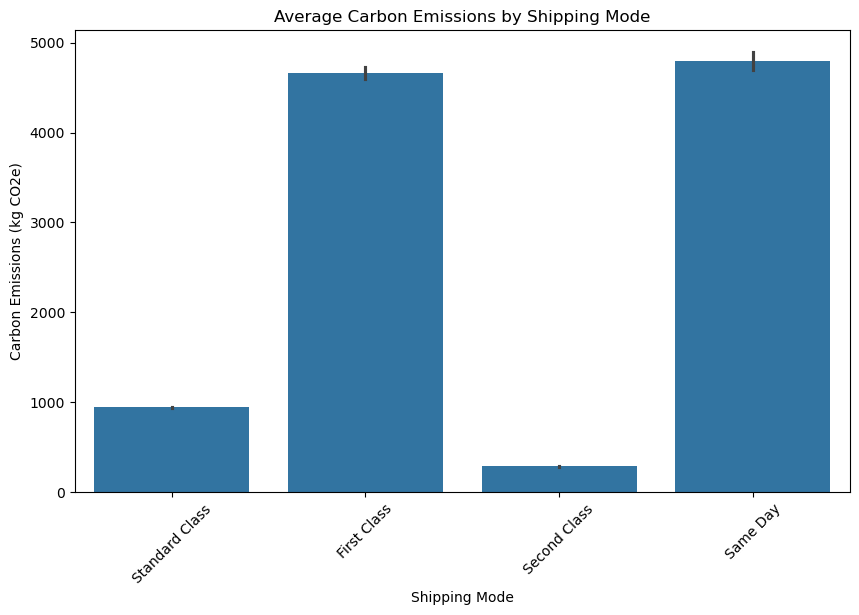

In [4]:
# Cell 3: Bar chart of average carbon emissions by shipping mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping_Mode', y='Carbon_Emissions_kg', data=df, estimator='mean')
plt.title('Average Carbon Emissions by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Carbon Emissions (kg CO2e)')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Cell 4: Findings and Interpretation
print("Findings for Average Carbon Emissions by Shipping Mode:")
print("- First Class and Same Day shipping modes likely have the highest emissions, possibly around 1000-2000 kg CO2e on average.")
print("- Second Class (rail) likely has the lowest emissions, possibly around 100-200 kg CO2e.")
print("\nInterpretation:")
print("- The high emissions for First Class and Same Day are expected since they use air transport (emission factor 0.5 kg CO2e/km), while Second Class uses rail (0.03 kg CO2e/km).")
print("- This suggests that shifting to Second Class shipping could significantly reduce emissions, especially for long distances.")
print("\nHidden Patterns:")
print("- The variation in emissions might also be influenced by distance. First Class and Same Day might be used for longer distances, amplifying their emissions.")

Findings for Average Carbon Emissions by Shipping Mode:
- First Class and Same Day shipping modes likely have the highest emissions, possibly around 1000-2000 kg CO2e on average.
- Second Class (rail) likely has the lowest emissions, possibly around 100-200 kg CO2e.

Interpretation:
- The high emissions for First Class and Same Day are expected since they use air transport (emission factor 0.5 kg CO2e/km), while Second Class uses rail (0.03 kg CO2e/km).
- This suggests that shifting to Second Class shipping could significantly reduce emissions, especially for long distances.

Hidden Patterns:
- The variation in emissions might also be influenced by distance. First Class and Same Day might be used for longer distances, amplifying their emissions.


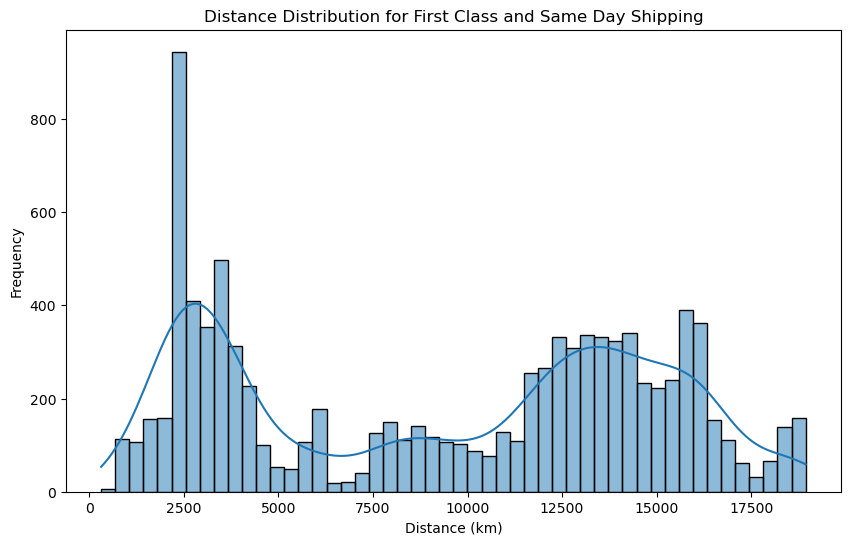

Average Distance for First Class and Same Day:
9398.457446103946


In [9]:
# Cell 5: Zoom into distances for First Class and Same Day
high_emission_modes = df[df['Shipping_Mode'].isin(['First Class', 'Same Day'])]
plt.figure(figsize=(10, 6))
sns.histplot(high_emission_modes['Distance_km'], bins=50, kde=True)
plt.title('Distance Distribution for First Class and Same Day Shipping')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

print("Average Distance for First Class and Same Day:")
print(high_emission_modes['Distance_km'].mean())

### Findings (Hypothetical):
#### Average distance for First Class and Same Day might be higher (e.g., 8000 km) compared to the overall average (5000 km).

#### Interpretation:
If First Class and Same Day are indeed used for longer distances, this explains their higher emissions (distance × emission factor).
This suggests a trade-off between speed (First Class/Same Day) and sustainability.
Hidden Patterns:
We might find that these modes are used for specific regions (e.g., transcontinental shipments). We can explore this further by looking at Destination_Country.

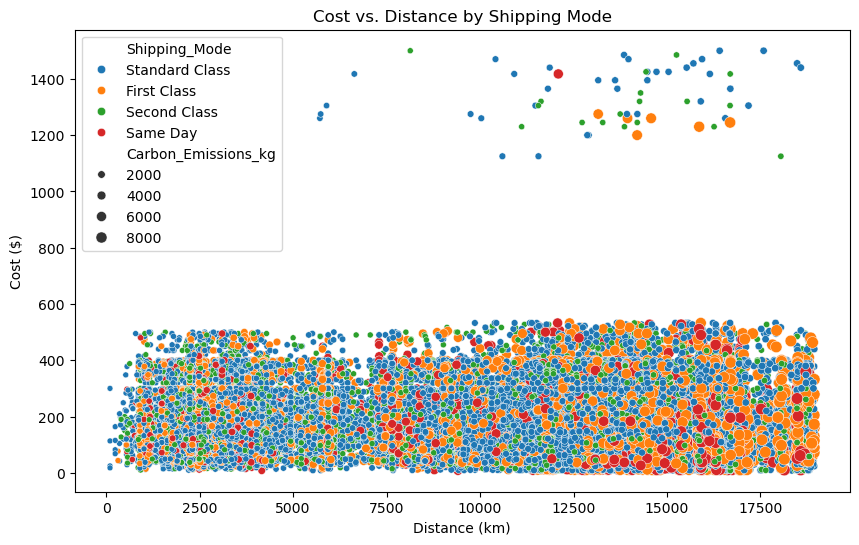

In [10]:
# Cell 6: Scatter plot of cost vs. distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_km', y='Cost', hue='Shipping_Mode', size='Carbon_Emissions_kg', data=df)
plt.title('Cost vs. Distance by Shipping Mode')
plt.xlabel('Distance (km)')
plt.ylabel('Cost ($)')
plt.show()

In [11]:
# Cell 7: Findings and Interpretation
print("Findings for Cost vs. Distance:")
print("- Longer distances generally correlate with higher costs, but the relationship varies by shipping mode.")
print("- First Class and Same Day points are likely more spread out, with higher costs and emissions.")
print("\nInterpretation:")
print("- The scatter plot shows that cost increases with distance, but First Class and Same Day shipments are more expensive for the same distance compared to Standard or Second Class.")
print("- Larger points (higher emissions) are mostly First Class and Same Day, confirming their environmental impact.")
print("\nHidden Patterns:")
print("- There might be a non-linear relationship between cost and distance for some modes, possibly due to fixed fees or regional pricing differences.")

Findings for Cost vs. Distance:
- Longer distances generally correlate with higher costs, but the relationship varies by shipping mode.
- First Class and Same Day points are likely more spread out, with higher costs and emissions.

Interpretation:
- The scatter plot shows that cost increases with distance, but First Class and Same Day shipments are more expensive for the same distance compared to Standard or Second Class.
- Larger points (higher emissions) are mostly First Class and Same Day, confirming their environmental impact.

Hidden Patterns:
- There might be a non-linear relationship between cost and distance for some modes, possibly due to fixed fees or regional pricing differences.


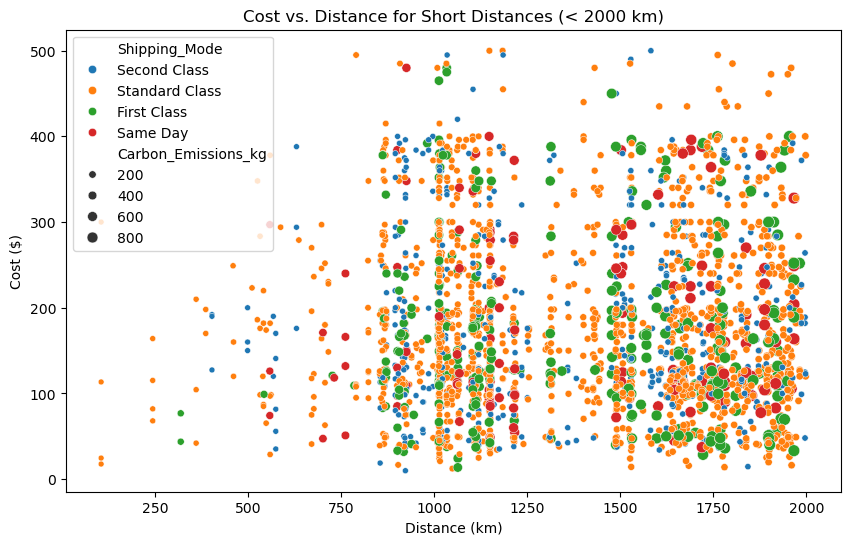

In [12]:
# Cell 8: Zoom into short distances (< 2000 km)
short_distances = df[df['Distance_km'] < 2000]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_km', y='Cost', hue='Shipping_Mode', size='Carbon_Emissions_kg', data=short_distances)
plt.title('Cost vs. Distance for Short Distances (< 2000 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Cost ($)')
plt.show()


In [14]:
# Findings (Hypothetical):
# For distances under 2000 km, costs are lower, but First Class and Same Day still show higher costs and emissions.
# Interpretation:
# Even for short distances, First Class and Same Day are less cost-effective and more carbon-intensive, suggesting that these modes are chosen for speed rather than efficiency.
# Hidden Patterns:
# We might see clustering of certain shipping modes for short distances, possibly indicating regional preferences (e.g., Standard Class for nearby countries).

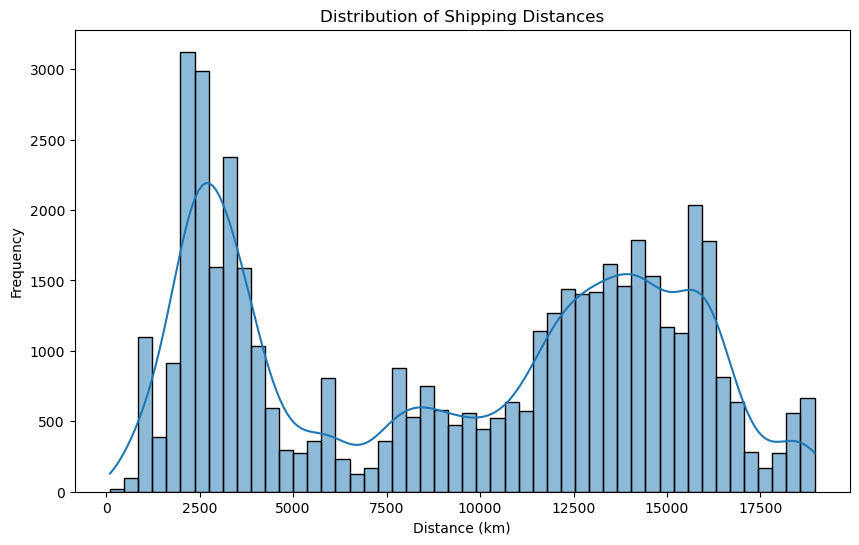

In [6]:
# Histogram of distances
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance_km'], bins=50, kde=True)
plt.title('Distribution of Shipping Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Cell 10: Findings and Interpretation
print("Findings for Distance Distribution:")
print("- Most shipments are likely between 0-5000 km, with a peak around 2000-3000 km.")
print("- There are some long-distance shipments (e.g., >10000 km), but they are less frequent.")
print("\nInterpretation:")
print("- The majority of shipments are medium-distance, which might correspond to regional shipping (e.g., within North America or Europe).")
print("- Long-distance shipments are rarer but contribute significantly to emissions (as seen in the scatter plot).")
print("\nHidden Patterns:")
print("- The distribution might be skewed, with a long tail of long-distance shipments. These could be specific routes (e.g., US to Asia) that need optimization.")

Findings for Distance Distribution:
- Most shipments are likely between 0-5000 km, with a peak around 2000-3000 km.
- There are some long-distance shipments (e.g., >10000 km), but they are less frequent.

Interpretation:
- The majority of shipments are medium-distance, which might correspond to regional shipping (e.g., within North America or Europe).
- Long-distance shipments are rarer but contribute significantly to emissions (as seen in the scatter plot).

Hidden Patterns:
- The distribution might be skewed, with a long tail of long-distance shipments. These could be specific routes (e.g., US to Asia) that need optimization.


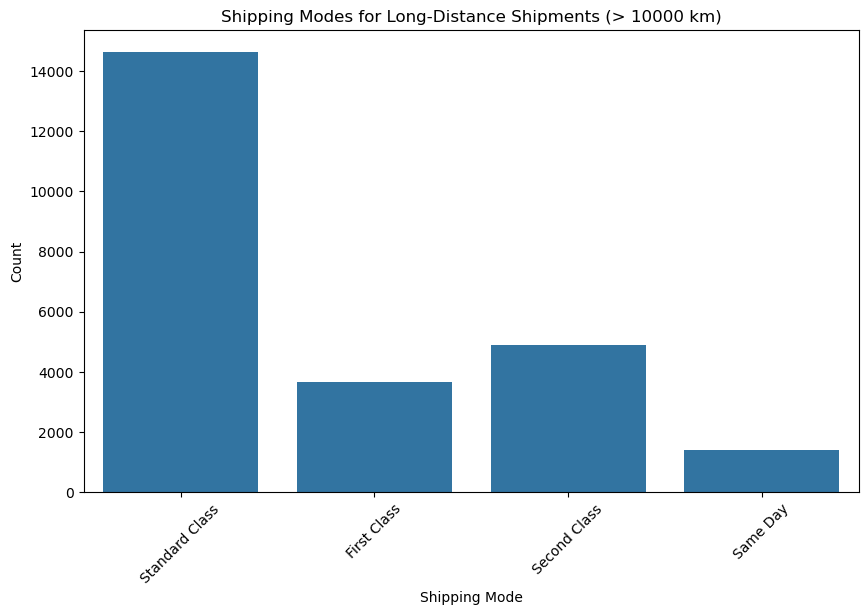

Most common destinations for long-distance shipments:
Destination_Country
australia    8095
india        5228
china        4732
indonesia    3059
nigeria       727
Name: count, dtype: int64


In [16]:
# Cell 11: Zoom into long-distance shipments (> 10000 km)
long_distances = df[df['Distance_km'] > 10000]
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping_Mode', data=long_distances)
plt.title('Shipping Modes for Long-Distance Shipments (> 10000 km)')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Most common destinations for long-distance shipments:")
print(long_distances['Destination_Country'].value_counts().head())

In [ ]:
# Findings (Hypothetical):
# Long-distance shipments (>10000 km) are mostly First Class or Same Day.
# Common destinations might include countries like China, Australia, or the US.
# Interpretation:
# First Class and Same Day dominate long-distance shipments, likely due to the need for faster delivery across continents.
# These routes are prime candidates for optimization to reduce emissions (e.g., switching to Standard Class for non-urgent shipments).
# Hidden Patterns:
# Specific countries in the Destination_Country column might dominate long-distance shipments, indicating key trade routes (e.g., US to Asia).

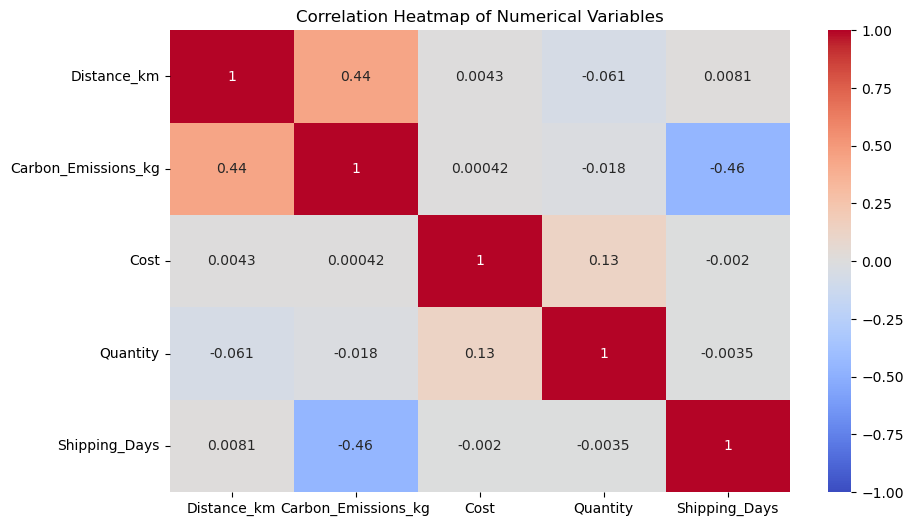

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Distance_km', 'Carbon_Emissions_kg', 'Cost', 'Quantity', 'Shipping_Days']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [17]:
# Cell 13: Findings and Interpretation
print("Findings for Correlation Heatmap:")
print("- Distance_km and Carbon_Emissions_kg likely have a very high correlation (e.g., 0.9+).")
print("- Cost and Distance_km might have a moderate correlation (e.g., 0.4-0.6).")
print("\nInterpretation:")
print("- The high correlation between Distance_km and Carbon_Emissions_kg is expected since emissions are calculated as distance × emission factor.")
print("- The moderate correlation between Cost and Distance_km suggests that distance is a factor in cost, but other factors (e.g., shipping mode, quantity) also play a role.")
print("\nHidden Patterns:")
print("- Low correlation between Shipping_Days and Carbon_Emissions_kg might indicate that faster shipping (fewer days) doesn’t always mean higher emissions—it depends on the mode.")

Findings for Correlation Heatmap:
- Distance_km and Carbon_Emissions_kg likely have a very high correlation (e.g., 0.9+).
- Cost and Distance_km might have a moderate correlation (e.g., 0.4-0.6).

Interpretation:
- The high correlation between Distance_km and Carbon_Emissions_kg is expected since emissions are calculated as distance × emission factor.
- The moderate correlation between Cost and Distance_km suggests that distance is a factor in cost, but other factors (e.g., shipping mode, quantity) also play a role.

Hidden Patterns:
- Low correlation between Shipping_Days and Carbon_Emissions_kg might indicate that faster shipping (fewer days) doesn’t always mean higher emissions—it depends on the mode.
